# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [2]:
# !pip install torch

import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [3]:
import numpy as np

X= torch.rand(4,3)
Y= torch.rand(4,3)

# 행으로 병합 코드
row = torch.cat((X, Y), dim = 0)
print(row)

# 열로 병합 코드
col = torch.cat((X, Y), dim = 1)
print(col)

tensor([[0.0357, 0.7991, 0.6535],
        [0.4562, 0.4124, 0.7308],
        [0.5921, 0.3632, 0.1357],
        [0.9039, 0.3872, 0.0851],
        [0.0994, 0.7587, 0.4267],
        [0.2547, 0.0338, 0.4147],
        [0.4921, 0.7693, 0.8986],
        [0.5167, 0.9592, 0.4312]])
tensor([[0.0357, 0.7991, 0.6535, 0.0994, 0.7587, 0.4267],
        [0.4562, 0.4124, 0.7308, 0.2547, 0.0338, 0.4147],
        [0.5921, 0.3632, 0.1357, 0.4921, 0.7693, 0.8986],
        [0.9039, 0.3872, 0.0851, 0.5167, 0.9592, 0.4312]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [9]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

  Obtaining dependency information for d2l from https://files.pythonhosted.org/packages/8b/39/418ef003ed7ec0f2a071e24ec3f58c7b1f179ef44bec5224dcca276876e3/d2l-1.0.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 11.8 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for matplotlib==3.7.2 from https://files.pythonhosted.org/packages/1d/57/888776de79e1c2e787368ecbe63e3e57dbec984a5c83220e44c15fefe226/matplotlib-3.7.2-cp39-cp39-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for requests==2.31.0 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for pandas==2.0.3 from https://files.pythonhosted.org/packages/f8/c7/cfef920b7b457dff6928e824896cb82367650ea127d048ee0b820026db4f/pandas-2.0.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 7.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver 

In [12]:
!pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/50/5b/fde5d91a5934cd5a5f78fc88b40c3382dd46d28c1c8e6efc8039c8d3e340/torchvision-0.16.2-cp39-cp39-macosx_10_13_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [7]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-2.0625,  1.2114]) 
label: tensor([-2.4918])


In [43]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [44]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.5826, -1.3463],
        [-0.0916, -0.2030],
        [-0.6591,  0.8396],
        [-0.5235,  0.0462],
        [-1.1011, -0.4551],
        [-0.6339, -1.6250],
        [-0.0134, -1.2963],
        [ 0.2430,  0.9469],
        [ 2.0826, -0.9047],
        [ 0.6307,  1.6878],
        [-0.7600, -0.0487],
        [-0.7623,  0.6149],
        [ 0.5309,  0.7065],
        [ 0.3297,  0.1588],
        [ 0.3341,  0.8474],
        [ 0.7394, -0.5341],
        [ 0.1152, -0.5442],
        [-0.2996, -0.7120],
        [ 0.5103, -1.0378],
        [-0.7477, -0.9471]]) 
 tensor([[ 2.7791],
        [ 5.5385],
        [ 2.2861],
        [ 3.8603],
        [ 2.8787],
        [ 6.0417],
        [ 7.4183],
        [ 4.8098],
        [13.1015],
        [ 4.8558],
        [ 3.2951],
        [ 2.2843],
        [ 6.0337],
        [ 6.2508],
        [ 5.2456],
        [ 8.5197],
        [ 6.6622],
        [ 5.6573],
        [ 8.5732],
        [ 4.6971]])


In [45]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([2.4], requires_grad=True)#원하는 실수를 넣어주세요

In [46]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [47]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return 0.5 * torch.mean((y_hat-y)**2)

In [48]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [49]:
lr = 0.01
num_epochs = 100
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 9.613095
epoch 2, loss 8.679604
epoch 3, loss 7.836768
epoch 4, loss 7.075786
epoch 5, loss 6.388709
epoch 6, loss 5.768351
epoch 7, loss 5.208239
epoch 8, loss 4.702524
epoch 9, loss 4.245917
epoch 10, loss 3.833653
epoch 11, loss 3.461421
epoch 12, loss 3.125339
epoch 13, loss 2.821889
epoch 14, loss 2.547907
epoch 15, loss 2.300530
epoch 16, loss 2.077176
epoch 17, loss 1.875509
epoch 18, loss 1.693422
epoch 19, loss 1.529019
epoch 20, loss 1.380577
epoch 21, loss 1.246549
epoch 22, loss 1.125536
epoch 23, loss 1.016269
epoch 24, loss 0.917610
epoch 25, loss 0.828532
epoch 26, loss 0.748102
epoch 27, loss 0.675481
epoch 28, loss 0.609911
epoch 29, loss 0.550707
epoch 30, loss 0.497252
epoch 31, loss 0.448987
epoch 32, loss 0.405407
epoch 33, loss 0.366058
epoch 34, loss 0.330530
epoch 35, loss 0.298450
epoch 36, loss 0.269485
epoch 37, loss 0.243332
epoch 38, loss 0.219718
epoch 39, loss 0.198396
epoch 40, loss 0.179144
epoch 41, loss 0.161760
epoch 42, loss 0.146065
e

In [50]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0171, -0.0089], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0197], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

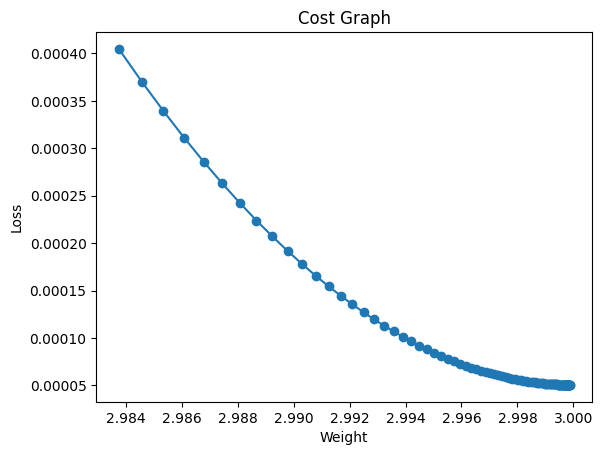

In [51]:
import matplotlib.pyplot as plt

losses = []
weights = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        losses.append(float(train_l.mean()))
        weights.append(float(w[0]))  
        
# Plotting the cost graph
plt.plot(weights, losses, marker='o', linestyle='-')
plt.title('Cost Graph')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [70]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [71]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [72]:
next(iter(data_iter))

[tensor([[ 1.4547,  1.4260],
         [-0.6616,  0.8592],
         [ 0.3119, -1.2577],
         [-2.0543,  0.1778],
         [ 0.8635,  0.7985],
         [-0.2547, -0.5399],
         [-0.6856, -0.0559],
         [-1.1658, -0.0747],
         [ 0.4595, -0.6665],
         [-1.1172,  2.6198],
         [-0.2957, -0.2513],
         [ 1.3215, -1.2812],
         [-1.5021, -1.5997],
         [ 1.7664, -0.6984],
         [ 0.3097,  0.5501],
         [ 0.3340, -0.0208],
         [ 0.5115,  0.8994],
         [-0.8845, -0.6324],
         [-1.0144,  1.6600],
         [ 0.8603,  0.7288]]),
 tensor([[ 7.7353],
         [ 2.2040],
         [ 8.3299],
         [-0.9247],
         [ 6.9109],
         [ 5.5376],
         [ 3.5365],
         [ 2.1105],
         [ 7.8791],
         [-1.7836],
         [ 5.0003],
         [11.3785],
         [ 3.4006],
         [11.8579],
         [ 5.5930],
         [ 6.5194],
         [ 5.6923],
         [ 3.8138],
         [-0.0172],
         [ 6.9944]])]

In [73]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [74]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [75]:
loss = nn.MSELoss()

In [76]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [77]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.677159
epoch 2, loss 0.010987
epoch 3, loss 0.000277


In [78]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0043, -0.0047])
error in estimating b: tensor([0.0113])
